<a href="https://colab.research.google.com/github/jlazo3010/Entrega_trabajo_final/blob/main/Interpolaci%C3%B3n_de_Lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos paquetes
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd
import sympy

In [ ]:
#Exportamos datos 
indicador_empleo = pd.read_csv('/content/drive/MyDrive/Analisis_numerico/Empleo_porcentaje.csv')
indicador_inflacion = pd.read_csv('/content/drive/MyDrive/Analisis_numerico/Inflacion_porcentaje.csv')
indicador_produccion = pd.read_csv('/content/drive/MyDrive/Analisis_numerico/ProduccionConstruccion.csv')

In [ ]:
#Limpieza de Na´s
indicador_empleo = indicador_empleo.dropna(axis=0, how='any')
indicador_inflacion = indicador_inflacion.dropna(axis=0, how='any')
indicador_produccion = indicador_produccion.dropna(axis=0, how='any')

In [ ]:
def arg_prod(i, j, x):
    """ Argumento para producir las bases polinómicas de Lagrange."""
    # Variable simbólica
    x_sim = sympy.symbols('x')
    return (x_sim-x[i]) / (x[j]-x[i]) if i != j else 1

def interpolacion_lagrange(df, num_puntos=100):

    # Definimos las entradas
    x = np.arange(0,len(df.iloc[:,1]))
    y = df.iloc[:,1]
    # Variable simbólica
    x_sim = sympy.symbols('x')
    
    # Número de puntos ingresados
    points = len(x)
    
    # Bases polinómicas lj = [l1, l2, ..., lk]
    lj = []
    for k in range(points):
        lk = np.prod([arg_prod(i, k, x) for i in range(points)])
        lj.append(lk)

    # Polinomio de lagrange
    pol = sum(y*lj)
    
    # Se generan los datos x, y a partir del polinomio encontrado
    x_test = np.linspace(min(x), max(x), num_puntos)
    y_pol = [pol.subs(x_sim, i) for i in x_test]
    plt.figure(figsize=(10,7))
    plt.plot(x_test, y_pol)
    plt.scatter(x, y)
    plt.legend(['Lagrange', 'Datos'], loc='best')
    plt.ticklabel_format(style="plain", axis="y")

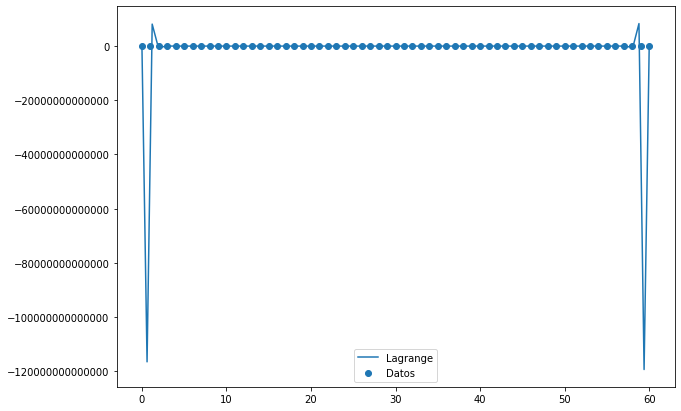

In [ ]:
interpolacion_lagrange(indicador_empleo)

In [ ]:
interpolacion_lagrange(indicador_inflacion)

In [ ]:
interpolacion_lagrange(indicador_produccion)

KeyboardInterrupt: ignored